In [3]:
import doralite
import gfdl_utils.core as gu

### Extracting experiment metadata from DORA

We use the `doralite.search` function.

In [4]:
doralite.search("/om5_b")

{2078: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_cycle1/gfdl.ncrc4-intel22-prod/pp/',
 2079: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_cycle1/gfdl.ncrc5-intel23-prod/pp/',
 2080: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230724/om5_b00_nonBouss/gfdl.ncrc4-intel22-prod/pp/',
 2089: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_coorconfigALE/gfdl.ncrc5-intel23-prod/pp/',
 2090: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_BBL_VS_KV0_MStrC1p25_minThk_Bodner0p03/gfdl.ncrc5-intel23-prod/pp/',
 2091: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_ePBLbisect/gfdl.ncrc5-intel23-prod/pp/',
 2092: '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_nonSymmetric/gfdl.ncrc5-intel23-prod/pp/',
 2106: '/archive/Olga.Sergienko/fre_om5/FMS2023.01_om5_20230720/om5_b00_BBL_VS_KV0_MStrC1p25_minThk_Bodner0p03/gfdl.ncrc4-intel22-prod/pp/',
 2107: '/archive/Brandon.Reichl/fre_om5/FMS20

We can retrieve the DORA metadata for a particular experiment we are interested in.

In [5]:
doralite.dora_metadata(2108)

{'displayName': None,
 'expLabels': None,
 'expLength': None,
 'expMIP': None,
 'expName': 'om5_b00_nonBouss_c5',
 'expType': None,
 'expYear': None,
 'gfdlHistoryYear': None,
 'id': 2108,
 'jobID': None,
 'master_id': '2108',
 'modelType': 'OM5',
 'owner': 'Brandon.Reichl',
 'pathAnalysis': '/nbhome/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230724/om5_b00_nonBouss/',
 'pathDB': '/home/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230724/om5_b00_nonBouss/gfdl.ncrc5-intel23-prod/db/',
 'pathLog': None,
 'pathPP': '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230724/om5_b00_nonBouss/gfdl.ncrc5-intel23-prod/pp/',
 'pathScript': '/lustre/f2/dev/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230724/om5_b00_nonBouss/ncrc5.intel23-prod/scripts/om5_b00_nonBouss/',
 'pathXML': '/home/bgr/ncrc/OM5/om5-xml/om5_b00_nonBoussinesq.xml/',
 'queue': None,
 'refresh': None,
 'requested_id': '2108',
 'source': 'sql',
 'status': None,
 'urlCurator': None,
 'userName': 'Brandon.Reichl',
 'pathHistory': '/archive/Bra

### Searching an odiv experiment for a variable, loading it, and plotting it 

Alternatively, we can use the `doralite.dora_metadata` function to extract metadata for an O-Div experiment.

In [7]:
exp = "odiv-296"
doralite.dora_metadata(exp)

{'displayName': 'None',
 'expLabels': 'None',
 'expLength': None,
 'expMIP': None,
 'expName': 'om5_b00_dtcpld1800_BBL_c5',
 'expType': 'None',
 'expYear': None,
 'gfdlHistoryYear': None,
 'id': 2169,
 'jobID': None,
 'master_id': 2169,
 'modelType': 'OM5',
 'owner': 'Brandon.Reichl',
 'pathAnalysis': '/nbhome/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/',
 'pathDB': '/home/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/db/',
 'pathLog': 'None/',
 'pathPP': '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp/',
 'pathScript': '/lustre/f2/dev/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/ncrc5.intel23-prod/scripts/om5_b00_dtcpld1800_BBL/',
 'pathXML': '/home/bgr/ncrc/OM5/om5-xml/om5_b00_dtcpld1800_BBL.xml/',
 'queue': None,
 'refresh': None,
 'requested_id': 'odiv-296',
 'source': 'sql',
 'status': None,
 'urlCurator': 'None',
 'userName

We can extract specific metadata from this dictionary, like the path to the post-processed (`pp`) directory.

In [8]:
pp = doralite.dora_metadata(exp)['pathPP']
pp

'/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp/'

Next, we use the `gfdl_utils.core.find_variable` function to search this `pp` directory for a variable of interest and return a list of the `pp` sub-directories where it is found.

In [9]:
ppnames = gu.find_variable(pp, 'tos')
ppnames

['ocean_daily', 'ocean_monthly', 'ocean_daily_1x1deg', 'ocean_monthly_1x1deg']

We can get the rest of the `local` path name to the files with the `gfdl_utils.core.get_local` function, in this case selecting the highest resolution `ocean_daily` output.

In [10]:
ppname = ppnames[0]
local = gu.get_local(pp, ppname, "ts")
local

'daily/5yr'

The `get_pathspp` and `get_pathstatic` functions will return the paths to the files of interest.

In [11]:
path = gu.get_pathspp(pp, ppname, "ts", local, "*", "*")
path_static = gu.get_pathstatic(pp, ppname)
path, path_static

('/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp//ocean_daily/ts/daily/5yr/ocean_daily.*.*.nc',
 '/archive/Brandon.Reichl/fre_om5/FMS2023.01_om5_20230720/om5_b00_dtcpld1800_BBL/gfdl.ncrc5-intel23-prod/pp//ocean_daily/ocean_daily.static.nc')

Alternatively, we can pass the same set of arguments to `open_frompp` and `open_static` to directly load in the data of interest. We pass the `dmget=True` keyword argument to guarantee that the data is migrated to disc before loading it as an `xr.Dataset`.

In [12]:
import xarray as xr
ds = gu.open_frompp(pp, ppname, "ts", local, "*2018*", "tos", dmget=True)
grid = gu.open_static(pp, ppname)

Issuing dmget command to migrate data to disk. Migration complete.


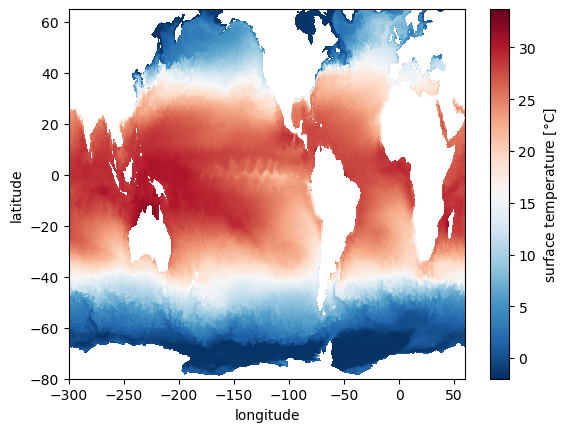

In [18]:
import matplotlib.pyplot as plt
plt.pcolor(
    grid['geolon_c'],
    grid['geolat_c'],
    ds['tos'].isel(time=0),
    cmap="RdBu_r"
)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.ylim(-80, 65);
plt.colorbar(label=r"surface temperature [$\degree$C]");